# Jeu du Puissance 4 
<hr style="color:black; height:1px" />

## Deuxième partie :
+ détecter si un joueur a gagné
+ détecter si la grille est pleine (sans vainqueur)
+ adapter le jeu pour que la partie s'arrête si l'un des deux cas se produit






<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;"> 1. Corrigé de la partie 1</p>

Ci-dessous, une correction possible pour la partie 1.

Toutes ces fonctions seront réutilisées dans cette seconde partie, vous devez donc exécuter cette cellule pour en disposer dans cette seconde partie.

In [ ]:
def creation_grille_vierge():
    ''' Cette fonction va créer un plateau de jeu vide. Les case vides sont représentées par par des "."
    
        IN: Rien
        OUT:la fonction renvoie une grille vierge
        
        C'est une liste, chaque élément étant lui même une liste de string :  ["-","-","-","-","-","-","-"] 
        C'est donc une liste de liste contentant 6 élément, chaqun d'eux étant une liste de 7 string, toutes égales à ".".
        
        Voila la grille vierege que l'on doit donc fabriquer :
            [ ["-","-","-","-","-","-","-"] , 
              ["-","-","-","-","-","-","-"] ,
              ...
              ["-","-","-","-","-","-","-"]  ]  
              
    '''

    grille_vierge = []
    # Pour chaque ligne
    for num_ligne in range(6):
        nouvelle_ligne = [] # on crée un nouveau tableau vide en mémoire
        for j in range(7): # On ajoute les sept éléments ".", séparémment.
            nouvelle_ligne.append("-")
            
        # On ajoute la nouvelle ligne à la grille
        grille_vierge.append(nouvelle_ligne)
    
    # Le travail est terminé, la variable globale grille est remplie, on quitte la procédure
    return grille_vierge


def affiche_grille(grille) -> None :
    ''' Cette fonction affiche la grille de jeu telle que ci-dessous
    IN: Rien
    OUT: La fonction renvoie une chaine de caractères contenant l'affichage comme ci-dessous : 
    
    Affichage souhaitée :
       0 1 2 3 4 5 6 
    0 |.|.|.|.|.|.|.|
    1 |.|.|.|.|.|.|.|
    2 |.|.|.|.|.|.|.|
    3 |.|.|.|.|.|.|.|
    4 |.|.|.|X|.|.|.|
    5 |O|X|.|X|O|X|O|
      ---------------
    '''
    
    # Initialisation :
    # créez une chaine affichage contenant la 1ere ligne
    # vous ajouterez \n en fin de ligne pour obtenir un retour à la ligne
    affichage = "   0 1 2 3 4 5 6\n"
    
    # Affichage des lignes
    for i in range(6): # Pour chaque ligne i
        # ajoutez le numéro de ligne plus un espace dans la chaine affichage
        affichage += str(i)+" "
        for j in range(7): # Pour chaque colonne j
            # ajoutez "|" plus la valeur de l'élément situé dans la case (ligne i, colonne j)
            affichage += "|"+ grille[i][j]
        # pour terminer la ligne, ajoutez un "|\n" dans affichage
        affichage += "|\n"
    # Affichage du trait en bas de la grille
    affichage += " "+"-"*15
    return affichage

def colonne_pleine(grille,indice_colonne) -> bool:
    '''
        IN: indice de la colonne à analyser (0 à 6)
        OUT: un booleen (True si la colonne est déjà pleine, False sinon)
    '''
    
    # il suffit de tester si l'élément à la ligne 0 de cette colonne est égal à '.'
    if grille[0][indice_colonne] != "-" : return True
    return False

def joue_jeton(grille, symboles, num_joueur, indice_colonne) -> None:
    ''' Place un jeton du joueur numéros num_joueur, dans la colonne indice_colonne.
    
        IN: num_joueur (int qui vaut 1 ou 2)
        OUT: la fonction renvoie la grille modifiée
    '''

    # Dans la colonne indice_colonne, en partant, du bas, on cherche la première case vide.
    # on suppose que la colonne n'est pas pleine, ce problème sera traité ailleur.
    
    for ligne in range(5,-1,-1) :
        if grille[ligne][indice_colonne] == '-' :
            grille[ligne][indice_colonne] = symboles[num_joueur]
            return grille
        
def demander_ou_jouer(grille,joueur) -> int:
    ''' Doit demander au joueur dans quel indice de colonne il souhaite jouer.
        Si l'indice n'est pas valable (non compris entre 0 et 6), ou bien s'il correspond à une colonne pleine, on lui indique
        que sa saisie est incorrecte et on lui renouvelle la question.
        Si l'utilisateur saisie 'q' (pour "Quitter"), la partie doit se terminer.
        IN: rien
        OUT: Renvoie un indice de colonne (int) valable (colonne non pleine) où l'on peut jouer.
        Si on entre 'q' la fonction renverra -1
    '''
    
    # on demande ou le joueur veux jouer.
    # on crée un massage (pour input) contenant l'affichage de la grille 
    # qu'on concatène avec la question (précédée d'un retour à la ligne):
    message = affiche_grille(grille)+"\nJOUEUR :"+str(joueur)+" dans quelle colonne jouez vous (0 à 6) ?"
    saisie = input(message)

    # on doit vérifier la saisie. On commence une boucle infinie
    # c'est une boucle while dont on ne peux sortir que losque l'on aura fait une saisie correcte
    # (dans ce cas, la fonction renvoie le nombre saisi)
    while True:
        
        # if faut que la longueur du texte entré soit égale à 1, et que 
        # ce texte soit un nombre 0-6, ou la lettre q
        
        if len(saisie)==1 and (saisie in "0123456q"):
            #La saisie est correct (1 seul caractère et il est autorisé)
            
            # on  traite le cas ou on a entré "q" :
            if saisie=="q" :
                return -1
                
            # On vérifie que la colonne n'est pas pleine
            # il faut convertir l'entrée en int, puis appeler colonne_pleine
            j = int(saisie)
            
            if colonne_pleine(grille,j):
                # on refait un input, en modifint un peu le message :
                saisie = input("ATTENTION, cette colonne est déjà pleine !\n"+message)
            else: #Sinon, il y a encore de la place 
                # On renvoie l'indice de la colonne choisie
                return j
        else:
            # La saisie est incorrecte, on refait un input en modifiant le message :
            saisie = input("SAISIE INCORRECTE\n"+message)
            
def jeu() :
    grille = creation_grille_vierge()
    symboles = {1:"x",2:"o"}
    joueur = 1
    cont = True
    
    while cont :
        n = demander_ou_jouer(grille,joueur)
        if n != -1 :
            # jouer le coup (modifier la grille) :
            grille = joue_jeton(grille,symboles,joueur,n)
            # changer de joueur :
            if joueur == 1 :
                joueur = 2
            else :
                joueur = 1
        else :
            # il faut arrêter la boucle infinie :
            cont = False

### Détecter une victoire

Nous arrivons dans la partie de détection d'une victoire.
Elle peut avoir lieu avec :
- 4 jetons alignés en ligne;
- 4 jetons alignés en colonne;
- 4 jetons alignés en diagonale.


<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;"> 2. Fonction Quatre_jetons_en_ligne</p>

Pour faire cette détection, une méthode possible consiste à utiliser les chaines de caractères:

En effet avec une chaîne de caractère qui représente le contenu d'une ligne, par exemple `"OXXXXO"`, il est facile de détecter la présence de `"XXXX"` grâce à l'opérateur `in` ( rappel: `texte in chaine` renvoie un booleen).

Exemple :
```python
ligne = ['.','X','X','X','X','.','O']
# on converti la liste en chaine :
chaine = "".join(ligne)
print('XXXX' in chaine)
```
Ce code affichera True.

**Complétez la fonction `Quatre_jetons_en_ligne()` ci-dessous :**


In [ ]:
def quatre_jetons_en_ligne(grille,symboles, num_joueur) -> bool:
    '''
        IN: 
            grille : une liste de listes modélisant le plateau
            symboles : dictionnaires définissant les jetons des 2 joueurs
            num_joueur; Numéros du joueur à détecter (1 ou 2)
        OUT: booleen (True si 4 jetons alignés trouvés en ligne, False sinon)
    '''
    
    # définition de la chaine à trouver
    jeton = ...
    chaine_a_trouver = ...
    
    # A vous : pour chaque ligne, si on y trouve la chaine_a_trouver, il faut renvoyer True
    ...

    # Si on arrive ici, c'est qu'aucun alignement de 4 jetons n'a été trouvé en ligne
    return False
    
    
# ------------ TEST  ----------------
# a vous de coder des tests...


<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;">3. Quatre_jetons_en_colonne</p>

Ajouter la fonction `Quatre_jetons_en_colonne()` sur le même principe que la fonction précédente. 

Toutefois, in faudra extraire de la grille les valeurs de la colonne. Vous pourrez le faire avec une liste en compréhension.

Elle devra **renvoyer un booléen** (True si 4 jetons alignés trouvés en colonne et False sinon).
<br><br><hr style="color:black; height:1px" />
<center><b>Aide : extraire une colonne de la grille</b></center>
<hr style="color:black; height:1px" />

Commencez par réfléchir : quels sont les numéros (i,j) de lignes et de colonnes des cases de la colonne j ?

Par exemple, regardons la colonne 4 :

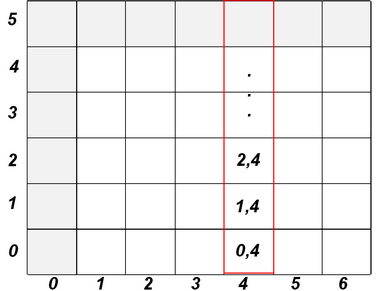

quels sont les éléments de cette colonnes ? On pourrait écrire quelques chose qui ressemble à ceci :

colonne = [ grille(0,4) , grille(1,4) , ...., grille(5,4) ]

La colonne 4 pourrait s'écrire en python : [ grille[...][...] for in in range(...)] (à vous de compléter )

et le même principe peut être répété dans une boucle pour les colonne 0 à 6.
<hr style="color:black; height:1px" />

In [ ]:
def quatre_jetons_en_colonne(grille,symboles,num_joueur):
    '''
        IN: 
            grille : une liste de listes modélisant le plateau
            symboles : dictionnaires définissant les jetons des 2 joueurs
            num_joueur; Numéros du joueur à détecter (1 ou 2)
        OUT: booleen (True si 4 jetons alignés trouvés en colonne, False sinon)
    '''
    
    # A vous !
  

# ------------ TEST ----------------
# a vous de coder des tests...


<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;">4. Quatre_jetons_diagonal</p>

Nous arrivons ici à une fonction un peu plus délicate à écrire:
Celle qui va détecter un alignement de 4 jetons en diagonale. 

Elle devra renvoyer un booleen.

Il y a plusieurs façons de procéder. En voici une: On peut découper le problème en deux parties:
* **PARTIE 1** : Détection alignement 4 jetons en **diagonale descendante vers la droite**;
* **PARTIE 2** : Détection alignement 4 jetons en **diagonale descendante vers la gauche**;

<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;">4.1 diagonale descendant à droite</p>


Il n'y a que 6 diagonales de ce type possible :

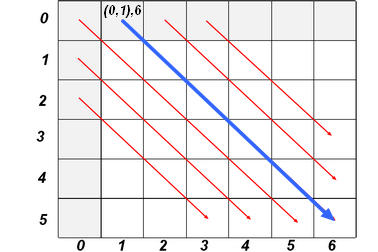

Chacune peut être définie par : un point de départ, et une longueur. Par exemple, la diagonale représentée en bleu, démarre aux coordonnées (0,1) et contient 6 éléments.


### Quelles sont les coordonnées de ces éléments ?

|Position|ligne|colonne|
|:-:|:-:|:-:|
|départ|0|1|
|1|1|2|
|2|2|3|
|3|3|4|
|4|4|5|
|5|5|6|

Quand on se décale vers le point suivant :
+ l'indice de ligne **augmente** de 1
+ l'indice de colonne **augmente** de 1.

Là encore il est possible d'écrire la diagonale avec une liste en compréhension :
```python
diag = [ grille[0+i][1+i] for i in range(6)]
```

Nous pouvons donc créer une liste de diagonales, contenant pour chaque diagonale un tuple de 3 éléments qui sont les indices de lignes et colonne du point de départ, et le nombre d'éléments de la diagonale.

Par exemple, la première diagonale sera (2,0,4) car elle démarre au point (2,0) et contient 4 cases.

```python
diagonales = [ (2,0,4) , ...]
```

Cela fait, nous pourrons pour chaque diagonale extraire les éléments à l'aide d'une liste en compréhension.

Par exemple, pour une diagonle définie par (i,j,n) :

```python
diag = [grille[i+k][i+k] for k in range(n) 
```

In [ ]:
def quatre_jetons_diagonal_1(grille,symboles, num_joueur) -> bool:
    '''
        IN: 
            grille : une liste de listes modélisant le plateau
            symboles : dictionnaires définissant les jetons des 2 joueurs
            num_joueur; Numéros du joueur à détecter (1 ou 2)
        OUT: booleen (True si 4 jetons alignés trouvé en diagonale, False sinon)

        Recherche d'une victoire sur les diagonales descendantes vers la droite:
    '''


    diagonales = [ (2,0,4) , ...completez...]

    # définition de la chaine à trouver
    jeton = symboles[joueur]
    chaine_a_trouver = jeton * 4
    
    for diagonale  in diagonales :
        ligne,colonne,n = diagonale

        diag = [ ... completez...]
        if ... :
            print("VICTOIRE EN DIAGONALE DE " + jeton)
            return True
    
    # Si on arrive ici, aucune diagonale n'a été trouvée, on renvoie False
    return False

# ----------- TEST  -------------
# a vous de coder des tests, il faudra utiliser vos fonctions pour remplir des grilles adaptées.


<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;">4.2 diagonale descendant à gauche</p>


A vous d'analyser le problème et écrire la fonction quatre_jetons_diagonal_2


### analyse (corrigé)

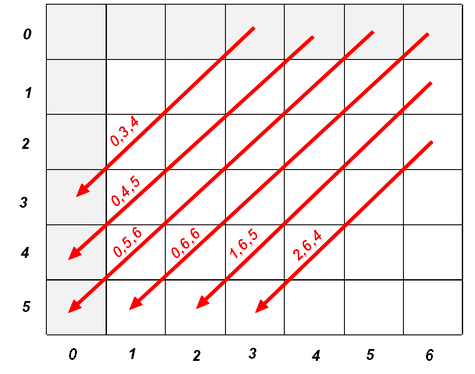

Quand on se décale vers le point suivant :
+ l'indice de ligne **augmente** de 1
+ l'indice de colonne **diminue** de 1.


In [ ]:
def quatre_jetons_diagonal_2(grille,symboles, num_joueur) -> bool:
    '''
        IN: 
            grille : une liste de listes modélisant le plateau
            symboles : dictionnaires définissant les jetons des 2 joueurs
            num_joueur; Numéros du joueur à détecter (1 ou 2)
        OUT: booleen (True si 4 jetons alignés trouvé en diagonale, False sinon)

        Recherche d'une victoire sur les diagonales descendantes vers la gauche:
    '''

    # a vous

# ----------- TEST  -------------



 <hr style="color:black; height:1px" />

<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;">5. Fonction grille_pleine</p>

Il est possible que la grille devienne pleine sans aucune victoire.
Dans ce cas, il faudra que la partie s'arrête. Il nous faut donc une fonction pour le détecter.

Elle devra **renvoyer un booleen** : `True` si la grille est pleine et `False` sinon.

Est-il vraiment nécessaire de tester si toutes les cases ont été remplies ? 

Ecrire la fonction `grille_pleine()` **qui fasse le moins de test possible** dans votre programme.


In [ ]:
def grille_pleine(grille) -> bool:
    '''
        IN: 
            grille : une liste de listes modélisant le plateau

        OUT: booleen (True si 4 jetons alignés trouvé en diagonale, False sinon)

        Recherche d'une victoire sur les diagonales descendantes vers la gauche:
    '''

    for col in range(7) :
        if colonne_pleine(grille,col) : return True
    
    # Si on arrive ici, aucune diagonale n'a été trouvée, on renvoie False
    return False

# ----------- TEST  -------------
grille = creation_grille_vierge()
print(affiche_grille(grille))
print('grille pleine ?',grille_pleine(grille))
print()
for col in range(7) :
    for li in range(6) :joue_jeton(grille,symboles,1, col)  # Joueur 1 joue 7 fois dans la colonne 4
print(affiche_grille(grille))
print('grille pleine ?',grille_pleine(grille))


 <hr style="color:black; height:1px" />

<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;">6. La fonction victoire et le jeu complet</p>

Il faut maintenant assembler tout ce que l'on a fait précédemment pour créer le jeu.

Compléter le code de la fonction victoire, puis adaptez le code de la fonction jeu, pour faire complètement fonctionner votre jeu de puissance 4 :

In [ ]:
def victoire(grille,symboles,joueur) :
    # A vous ...
    
    
# puis adaptez la fonction jeu() :
def jeu() :
    grille = creation_grille_vierge()
    symboles = {1:"x",2:"o"}
    joueur = 1
    cont = True
    
    while cont :
        n = demander_ou_jouer(grille,joueur)
        if n != -1 :
            # jouer le coup (modifier la grille) :
            grille = joue_jeton(grille,symboles,joueur,n)
            # changer de joueur :
            if joueur == 1 :
                joueur = 2
            else :
                joueur = 1
        else :
            # il faut arrêter la boucle infinie :
            cont = False
            
            
####### PROGRAMME PRINCIPAL :
jeu()

<p style="padding:5px;background-color:#66bb66;border:1px solid black;border-radius:20px;font-weight:bold;color:white;font-size:2em;">7. Dans un environnement python</b></p>

Sur votre bureau d'ordinateur par exemple, créer un dossier **"Projet Jeu du Puissance 4"**.

Dans ce dossier, et à l'aide de **Edupython** (ou d'un autre Editeur Python comme Thonny), créer un fichier **NOM-PRENOM-Puissance4.py** qui contient le code suivant (à copier coller):

<pre>
# *********************************
# Projet NSI : JEU DU PUISSANCE 4 
# Date: ...........
# Nom: .............
# Prénom: ..............
# *********************************

# fonctions et précédures :

vous recopierez les fonctions que vous avez crée

# programme principal
 jeu()
 
</pre>


C'est ce fichier que vous déposerez.

<hr style="color:black; height:1px" />

**J.B. Mouzet** (mailto:jbmouzet@gmail.com), Lycée Camille Sée - 75015 Paris

Modification par **François Hallé et Jean-Louis Thirot**, Lycée Bertrand d'Argentré, Vitré